# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [96]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

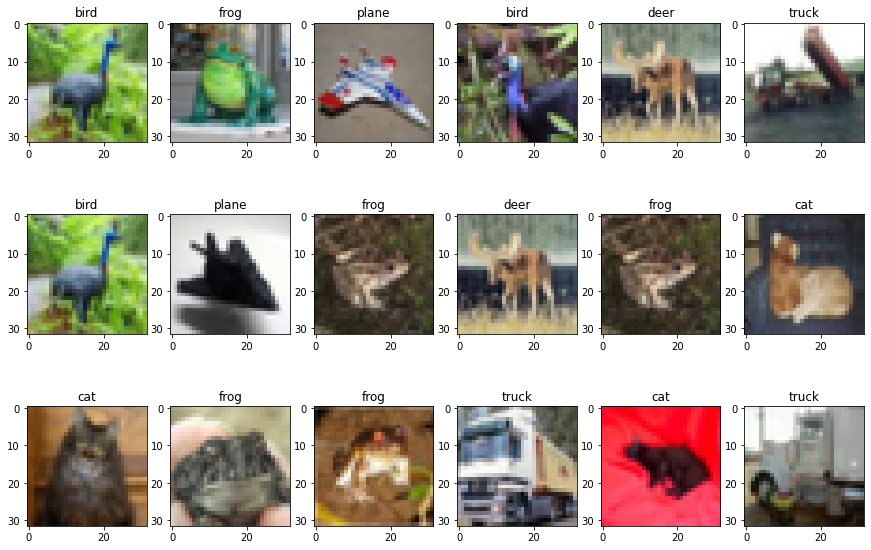

In [140]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

In [141]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

Yes, it is balanced.

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [99]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [100]:
# Dataset params
num_classes = 10
size = x_train.shape[1]

# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 1152)              0   

### Step 3: Training

Compile the model and train it.

In [101]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
352/352 [==============================] - 3s 8ms/step - loss: 1.7080 - accuracy: 0.3871 - val_loss: 1.5577 - val_accuracy: 0.4472
Epoch 2/25
352/352 [==============================] - 3s 8ms/step - loss: 1.3946 - accuracy: 0.5075 - val_loss: 1.3248 - val_accuracy: 0.5366
Epoch 3/25
352/352 [==============================] - 3s 8ms/step - loss: 1.2959 - accuracy: 0.5471 - val_loss: 1.2604 - val_accuracy: 0.5624
Epoch 4/25
352/352 [==============================] - 3s 7ms/step - loss: 1.2285 - accuracy: 0.5706 - val_loss: 1.1812 - val_accuracy: 0.5904
Epoch 5/25
352/352 [==============================] - 3s 8ms/step - loss: 1.1790 - accuracy: 0.5918 - val_loss: 1.1475 - val_accuracy: 0.6036
Epoch 6/25
352/352 [==============================] - 3s 9ms/step - loss: 1.1303 - accuracy: 0.6068 - val_loss: 1.1032 - val_accuracy: 0.6262
Epoch 7/25
352/352 [==============================] - 3s 10ms/step - loss: 1.0948 - accuracy: 0.6188 - val_loss: 1.1184 - val_accuracy: 0.6114
Epoch

Train Acc      0.713088870048523
Validation Acc 0.6841999888420105


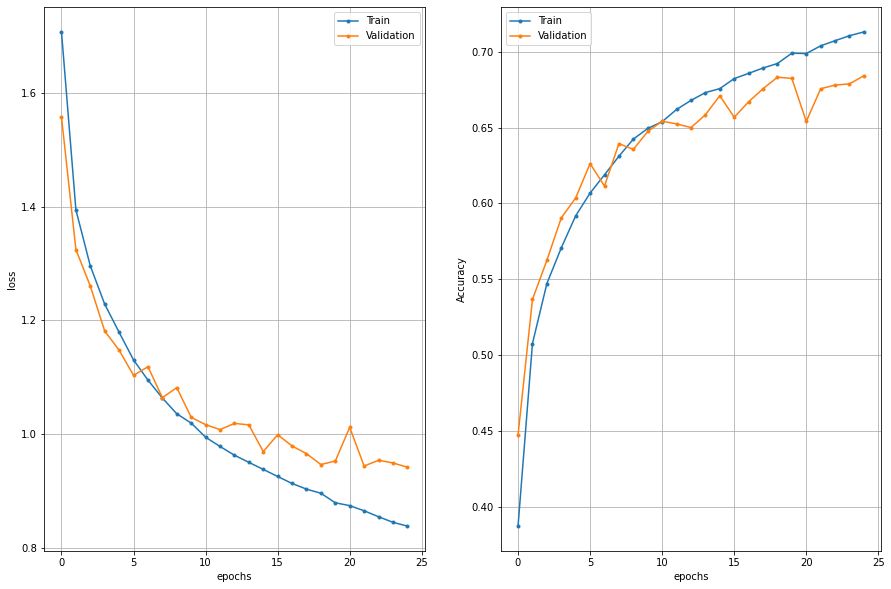

In [102]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [103]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [104]:
# Compute and print the accuracy for each class
y_pred = np.argmax(y_pred, axis=1)

for class_id, class_name in classes.items():
    mask = y_true == class_id
    
    tp = np.sum(y_pred[mask] == class_id)
    total = np.sum(mask)
    acc = tp/total
    print(class_name, acc)

plane 0.697
car 0.818
bird 0.633
cat 0.488
deer 0.474
dog 0.611
frog 0.75
horse 0.728
ship 0.723
truck 0.738


In [105]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.9679 - accuracy: 0.6660
Test loss   0.967873752117157
Test metric 0.6660000085830688


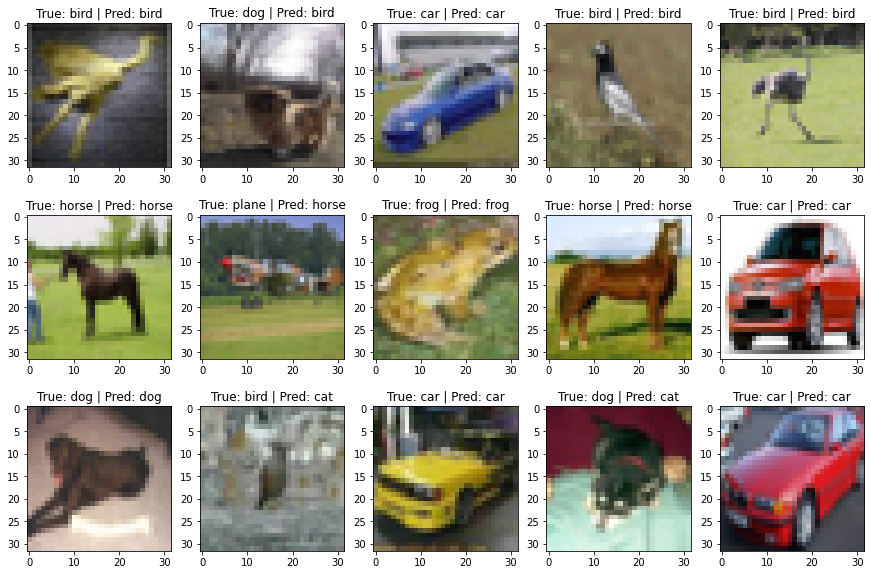

In [106]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?

Overall accuracy is 0.6660

* What modifications would you do in order to improve the classification accuracy?

May be we can increase accurancy by adding more layers or investigate which actiwation function is better. I would like to increace count of epoches, because in last homework I used count of epoches ~ 100

* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

I increased count of epoches to 125. Accuracy improved to 0.6801

Epoch 1/125
352/352 [==============================] - 4s 10ms/step - loss: 0.8355 - accuracy: 0.7127 - val_loss: 0.9420 - val_accuracy: 0.6866
Epoch 2/125
352/352 [==============================] - 3s 9ms/step - loss: 0.8289 - accuracy: 0.7152 - val_loss: 0.9399 - val_accuracy: 0.6850
Epoch 3/125
352/352 [==============================] - 3s 9ms/step - loss: 0.8170 - accuracy: 0.7200 - val_loss: 0.9476 - val_accuracy: 0.6784
Epoch 4/125
352/352 [==============================] - 3s 10ms/step - loss: 0.8105 - accuracy: 0.7216 - val_loss: 0.9328 - val_accuracy: 0.6870
Epoch 5/125
352/352 [==============================] - 3s 9ms/step - loss: 0.8107 - accuracy: 0.7217 - val_loss: 0.9234 - val_accuracy: 0.6954
Epoch 6/125
352/352 [==============================] - 3s 9ms/step - loss: 0.8020 - accuracy: 0.7239 - val_loss: 0.9236 - val_accuracy: 0.6888
Epoch 7/125
352/352 [==============================] - 3s 10ms/step - loss: 0.7946 - accuracy: 0.7265 - val_loss: 0.9397 - val_accuracy: 0.6

Epoch 58/125
352/352 [==============================] - 3s 9ms/step - loss: 0.6367 - accuracy: 0.7794 - val_loss: 1.0042 - val_accuracy: 0.6846
Epoch 59/125
352/352 [==============================] - 3s 9ms/step - loss: 0.6361 - accuracy: 0.7782 - val_loss: 0.9707 - val_accuracy: 0.6894
Epoch 60/125
352/352 [==============================] - 3s 9ms/step - loss: 0.6350 - accuracy: 0.7789 - val_loss: 0.9925 - val_accuracy: 0.6834
Epoch 61/125
352/352 [==============================] - 3s 9ms/step - loss: 0.6342 - accuracy: 0.7786 - val_loss: 0.9988 - val_accuracy: 0.6840
Epoch 62/125
352/352 [==============================] - 3s 10ms/step - loss: 0.6319 - accuracy: 0.7810 - val_loss: 1.0222 - val_accuracy: 0.6746
Epoch 63/125
352/352 [==============================] - 3s 9ms/step - loss: 0.6335 - accuracy: 0.7805 - val_loss: 0.9954 - val_accuracy: 0.6860
Epoch 64/125
352/352 [==============================] - 3s 9ms/step - loss: 0.6285 - accuracy: 0.7813 - val_loss: 0.9931 - val_accuracy

Epoch 115/125
352/352 [==============================] - 3s 9ms/step - loss: 0.5678 - accuracy: 0.8018 - val_loss: 1.0387 - val_accuracy: 0.6920
Epoch 116/125
352/352 [==============================] - 3s 9ms/step - loss: 0.5673 - accuracy: 0.8019 - val_loss: 1.0463 - val_accuracy: 0.6902
Epoch 117/125
352/352 [==============================] - 3s 9ms/step - loss: 0.5629 - accuracy: 0.8030 - val_loss: 1.0444 - val_accuracy: 0.6880
Epoch 118/125
352/352 [==============================] - 3s 9ms/step - loss: 0.5617 - accuracy: 0.8044 - val_loss: 1.0577 - val_accuracy: 0.6832
Epoch 119/125
352/352 [==============================] - 3s 9ms/step - loss: 0.5642 - accuracy: 0.8034 - val_loss: 1.0576 - val_accuracy: 0.6812
Epoch 120/125
352/352 [==============================] - 3s 10ms/step - loss: 0.5618 - accuracy: 0.8039 - val_loss: 1.0844 - val_accuracy: 0.6786
Epoch 121/125
352/352 [==============================] - 3s 9ms/step - loss: 0.5642 - accuracy: 0.8027 - val_loss: 1.0492 - val_a

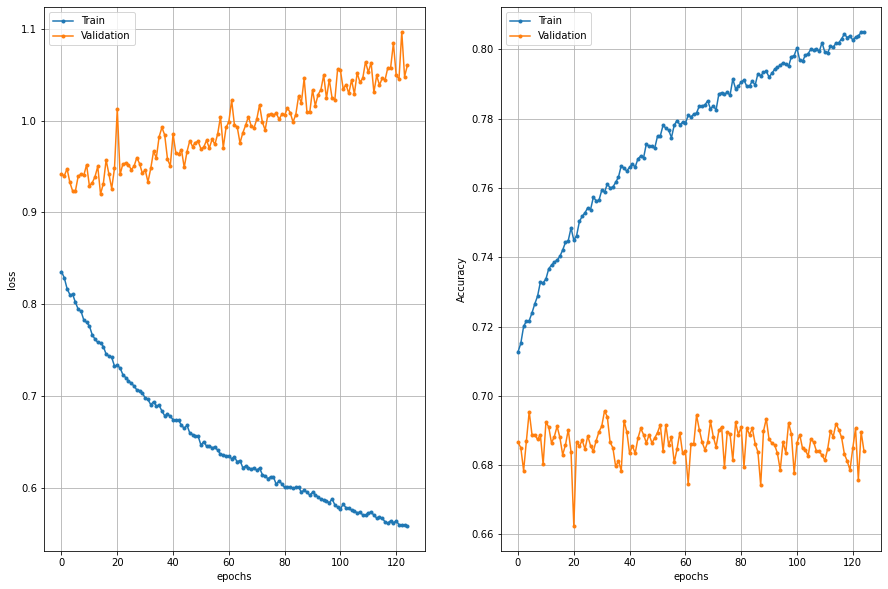

In [107]:
# Dataset params
num_classes = 10
size = x_train.shape[1]

# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

epochs = 125
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

# Compute and print the accuracy for each class
y_pred = np.argmax(y_pred, axis=1)

for class_id, class_name in classes.items():
    mask = y_true == class_id
    
    tp = np.sum(y_pred[mask] == class_id)
    total = np.sum(mask)
    acc = tp/total
    print(class_name, acc)

# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])